# Tutorial 2: Forward Kinematics

Welcome to Tutorial 2, where we will be looking at the Forward Kinematics (FK). This tutorial looks at the forward kinematics of a simple serial-chain robot. Note that,
* Forward kinematics: Finding the position and orientation of the end-effector relative to the base given the angles of all the joints.
* Inverse kinematics: Finding the values of the joint angles given the position and orientation of the end-effector relative to the base. 

## Import Packages


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Homogeneous Transformation Matrix

One key element in deriving the kinematics of a serial-chain manipulator is the homogeneous transformation matrix. We use this matrix to conveniently group the rotation and translation of a frame into a single matrix form: 
<br/> 
<br/> 
$$
T =
\left(\begin{array}{cc}
R & p \\
0_{1x3} & 1
\end{array}\right) 
=
\left(\begin{array}{cc}
r_{11} & r_{12} & r_{13} & x \\
r_{21} & r_{22} & r_{23} & y \\
r_{31} & r_{32} & r_{33} & z \\
0 & 0 & 0 & 1
\end{array}\right) 
$$

<br/>
For example, the homogeneous transform could be used when defining the the vector $^AP$ which describes a point relative to frame {A} using the known pose or transform between frames {A} to {B} and knowing the vector $^BP$.

<img src="images/frames.png" style="width: 600px;">

Without our homogeneous transformation matrix, this relationship would be described as:
<br/>
<br/>
<center>$^AP = {^A}R_B {^BP} + {^A}P_{BORG}$ </center>

But using the transformation matrix this relationship can be concisely written as:
<br/> 
<br/> 
<center>$$
\left(\begin{array}{c}
^AP \\
1
\end{array}\right) 
 = {^A}T_B 
\left(\begin{array}{c}
{^BP} \\
1
\end{array}\right) 
$$ </center>
<br/>
Where $^AP$ and $^BP$ are two vectors with positions known relative to frames {A} and {B} respectively.
<br/> 
<br/> 

## 3-Link Planar Manipulator
Below is the 3-link planar manipulator whose forward kinematics we will be implementing. The lengths of links 1, 2 and 3 are $L_1, L_2$ and $L_3$. The rotation about each of the three joints are ${\theta}_1, {\theta}_2$ and ${\theta}_3$. The **link 0** is the fixed base, e.g. the ground. The **end-effector** is the manipulator attached at the end of the robot which is the black gripper, see the diagrams below.

<table>
    <tr>
        <td><img src="images/3-link-angles.png" style="width: 300px;"> </td>
        <td><img src="images/3-link-frames.png" style="width: 280px;"> </td>
    </tr>
    <tr>
        <td style="text-align:center">Diagram of the links and joints</td>
        <td style="text-align:center">Diagram of the frames</td>
    </tr>
</table>

### Tasks:
1. Calculate the homogeneous transform matrices 
    * From frame {0} to {1} (no translation, rotation only)
    * From frame {1} to {2}
    * From frame {2} to {3}
2. Then, use the homogeneous transform matrices from (1), calculate the homogeneous transform matrix from the base (frame {0}) to the end-effector.
3. Ultimately, use the matrices from (1) and (2), implement a function that determines the x-y coordinate of each frame & the end-effector under the fixed frame {0}.

The tool you may find useful: 

    1. The 2-D homogeneous transform matrix is in the form of:
$$
T =
\left(\begin{array}{cc}
R & p \\
0_{1x2} & 1
\end{array}\right) 
=
\left(\begin{array}{cc}
r_{11} & r_{12}  & x \\
r_{21} & r_{22}  & y \\
0 & 0 & 1
\end{array}\right) 
$$

    2. The 2D rotation matrix $R$ parametrised with rotation angle $\theta$ is defined as:

$$
R
=
\left(\begin{array}{cc}
cos(\theta) & -sin(\theta) \\
sin(\theta) & cos(\theta) \\
\end{array}\right) 
$$


### Forward Kinematics

In [23]:
class ThreeLinkArm:
    
    def __init__(self):
        # Set parameters for the 3-link planar arm
        
        self.theta1 = np.deg2rad(30)
        self.theta2 = np.deg2rad(30)
        self.theta3 = np.deg2rad(30)
        self.l1 = 5
        self.l2 = 3
        self.l3 = 2

    def forwardKinematics(self, theta1, theta2, theta3):
        # Define the homogeneous transformation matrices for the 3-link planar arm
        
        self.theta1 = theta1
        self.theta2 = theta2
        self.theta3 = theta3

        self.t01 = np.matrix([
            [np.cos(self.theta1), -np.sin(self.theta1), 0],
            [np.sin(self.theta1), np.cos(self.theta1), 0],
            [0, 0, 1]
        ])
        
        # Implement the transformation matrix from frame {1} to frame {2}
        ### START CODE HERE ###
        self.t12 = np.matrix([
            [np.cos(self.theta2), -np.sin(self.theta2),self.l1],
            [np.sin(self.theta2), np.cos(self.theta2), 0],
            [0, 0, 1]
        ])


        self.t23 = np.matrix([
            [np.cos(self.theta3), -np.sin(self.theta3), self.l2],
            [np.sin(self.theta3), np.cos(self.theta3), 0],
            [0, 0, 1]
        ])
        
        # Implement the transformation matrix from frame {3} to the tip of the end-effector
        ### START CODE HERE ###
        self.t3end = np.matrix([
            [1,0,self.l3],
            [0,1,0],
            [0,0,1]
        ])
        ### END CODE HERE ###
        
        self.t0end = self.t01*self.t12*self.t23*self.t3end
        
        return self.t0end
    
    def findJointPos(self): 
        # Find the x,y position of each joint and end effector so it can be plotted
        
        # Find the transformation matrices for joint 2 and joint 3
        ### START CODE HERE ###
        t02 = self.t01*self.t12 
        t03 = self.t01*self.t12*self.t23 
        ### END CODE HERE ###
        
        # Find the x, y coordinates for joints 2 and 3. Put them in a list j2 = [x,y]
        ### START CODE HERE ###
        j2 = np.array([t02[0,2],t02[1,2]])
        j3 = np.array([t03[0,2],t03[1,2]])
        ### END CODE HERE ###
        
        endeff = np.array([self.t0end[0,2],self.t0end[1,2]])
        
        return j2,j3,endeff
        

def plotArm(jnt2pos, jnt3pos, endEffectPos, target=np.array([0,0])):
    # set up figure
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111, autoscale_on=False,
                         xlim=(-10, 10), ylim=(-10, 10))
    ax.grid()

    plt.plot(target[0],target[1],'or')
    line, = ax.plot([], [], 'o-', lw=4, mew=5)
    time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

    line.set_data([], [])
    time_text.set_text('')
    x = np.array([0, jnt2pos[0], jnt3pos[0], endEffectPos[0]])
    y = np.array([0, jnt2pos[1], jnt3pos[1], endEffectPos[1]])
    line.set_data((x,y))

    plt.show()

Homogeneous matrix from base to end effector: 
[[-1.0000000e+00 -1.2246468e-16  3.0000000e+00]
 [ 1.2246468e-16 -1.0000000e+00  3.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]
Joint 3 Coordinates: [5. 3.]
End effector Coordinates: [3. 3.]


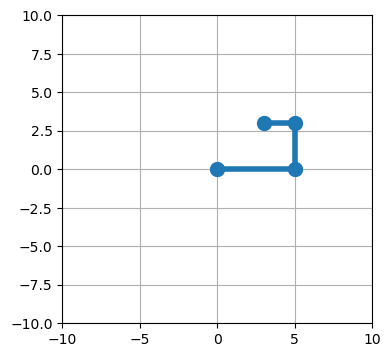

In [25]:
arm = ThreeLinkArm()

# Do forward kinematics for a set angle on each joint
T = arm.forwardKinematics(np.deg2rad(0),np.deg2rad(90),np.deg2rad(90))

# Find the x,y coordinates of joints 2, 3 and end effector so they can be plotted
joint2pos, joint3pos, endEffectorPos = arm.findJointPos()

# Print joint + end effector positions
print("Homogeneous matrix from base to end effector: \n" + str(T))
print("Joint 3 Coordinates: " + str(joint3pos))
print("End effector Coordinates: " + str(endEffectorPos))

# Plot the pose of the arm
plotArm(joint2pos, joint3pos, endEffectorPos)